In [7]:
import gensim
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary, MmCorpus
import matplotlib.pyplot as plt
import os
import time
import json
%env JOBLIB_TEMP_FOLDER= 'E:/sp2023stock/TopicModeling/tmp'


env: JOBLIB_TEMP_FOLDER='E:/sp2023stock/TopicModeling/tmp'


In [20]:
#input
main = os.getcwd()
model_path_asset_1mill = main + "/../data/modelDataset/CorpusDict"
model_save_path = main + "/../model/modelPretrainingState"

plot_save_path = main + "/../result/Evaluation/"


num = 25
model_path_asset_spenum = model_path_asset_1mill+str(num)
print(main)


E:\sp2023stock\TopicModeling\src


In [22]:
# Path to save the plot
print("Setting path plotting - model")

print("Dataset loading  dictionary - corpus - json")
# Load the dictionary and corpus
dictionary = Dictionary.load(f'{model_path_asset_spenum}/dictionary.gensim')
corpus = MmCorpus(f'{model_path_asset_spenum}/corpus.mm')
json_file_path = f'{model_path_asset_spenum}/dataset_{num}.json'

with open(json_file_path, 'r', encoding='utf-8') as json_file:
    dataset = json.load(json_file)
    
print(f"Dataset loaded - dictionary {len(dictionary)} - corpus {len(corpus)} - json")


Setting path plotting - model
Dataset loading  dictionary - corpus - json
Dataset loaded - dictionary 127737 - corpus 286816 - json


env: JOBLIB_TEMP_FOLDER='E:/sp2023stock/TopicModeling/tmp'
----------------------------------------------
Dataset loaded for evaluate using dataset -> dictionary 127737 - corpus 286816 (25%)
----------------------------------------------


Starting evaluation for 100 topics
Model with 100 topics saved to E:\sp2023stock\TopicModeling\src/../model/Modeling_n_Topics\lda_model_n100_iteration2000_size25.gensim
----------------------------------------------
Number of Topics: (100,) Process completed. Total runtime:  0h 3m 36s


Coherence c_v: 0.45367082122495483 | Coherence u_mass: -2.2496400033055295
----------------------------------------------


Starting evaluation for 200 topics
Model with 200 topics saved to E:\sp2023stock\TopicModeling\src/../model/Modeling_n_Topics\lda_model_n200_iteration2000_size25.gensim
----------------------------------------------
Number of Topics: (200,) Process completed. Total runtime:  0h 5m 7s


Coherence c_v: 0.4324934621279016 | Coherence u_mass: -2.5054

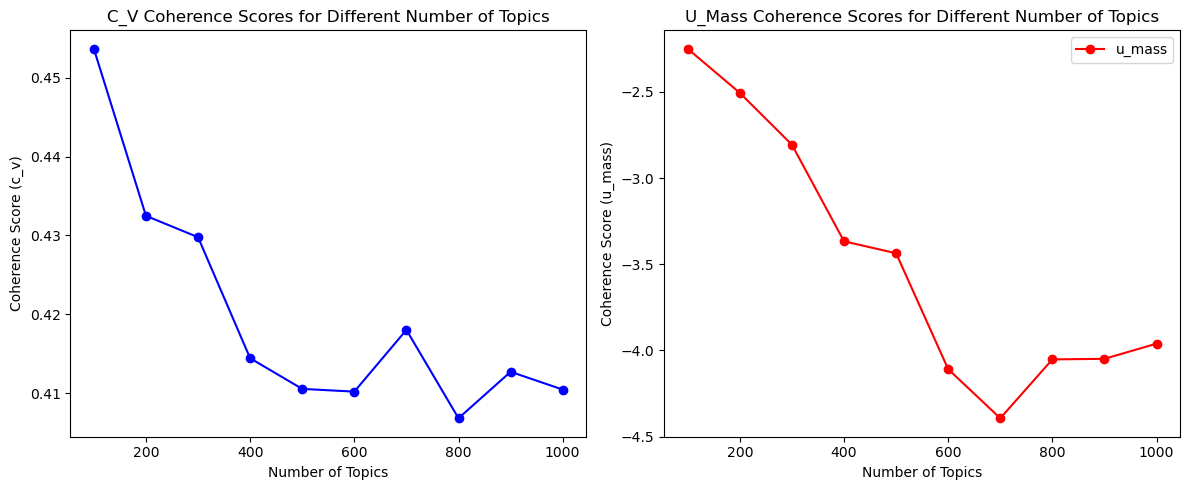

Evaluation complete.


In [27]:
%env JOBLIB_TEMP_FOLDER= 'E:/sp2023stock/TopicModeling/tmp'

num_topics_list = range(100, 1100, 100)
total_iterations = 2000
coherences_cv = []
coherences_umass = []
total_time = []


print("----------------------------------------------")
print(f"Dataset loaded for evaluate using dataset -> dictionary {len(dictionary)} - corpus {len(corpus)} ({num}%)")
print("----------------------------------------------")
print("\n")


for topics in num_topics_list:
    print(f'Starting evaluation for {topics} topics')
    start_time = time.time()

    # Initialize and train the LDA model
    lda = gensim.models.ldamulticore.LdaMulticore(
        corpus=corpus, 
        id2word=dictionary, 
        num_topics=topics, 
        iterations= total_iterations, 
        workers =os.cpu_count() - 1 )
  
    model_filename = os.path.join(model_save_path, f'lda_model_n{topics}_iteration{total_iterations}_size{num}.gensim')
    lda.save(model_filename)
    print(f'Model with {topics} topics saved to {model_filename}')

    # Calculate coherence c_v
    coherence_model_lda_cv = CoherenceModel(model=lda, texts=dataset, dictionary=dictionary, coherence='c_v')
    coherence_lda_cv = coherence_model_lda_cv.get_coherence()
    coherences_cv.append(coherence_lda_cv)

    # Calculate coherence U_mass
    coherence_model_lda_umass = CoherenceModel(model=lda, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    coherence_lda_umass = coherence_model_lda_umass.get_coherence()
    coherences_umass.append(coherence_lda_umass)



    # Process completed successfully
    end_time = time.time()
    
    time_taken = end_time - start_time
    total_time.append(time_taken)
    def format_duration(seconds):
        """Convert seconds to hours, minutes, and seconds."""
        hours = seconds // 3600
        minutes = (seconds % 3600) // 60
        seconds = seconds % 60
        return f"{int(hours)}h {int(minutes)}m {int(seconds)}s"
        
    print("----------------------------------------------")
    print(f"Number of Topics: {topics,} Process completed. Total runtime: ", format_duration(end_time - start_time))
    print("\n")
    print(f"Coherence c_v: {coherence_lda_cv} | Coherence u_mass: {coherence_lda_umass}")
    print("----------------------------------------------")
    print("\n")



# Plotting the Coherence Scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(num_topics_list, coherences_cv, marker='o', color='b', label='c_v')
plt.title('C_V Coherence Scores for Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (c_v)')

plt.subplot(1, 2, 2)
plt.plot(num_topics_list, coherences_umass, marker='o', color='r', label='u_mass')
plt.title('U_Mass Coherence Scores for Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (u_mass)')
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(plot_save_path, f'Evaluation_size{num}_iter{total_iterations}.png'))
plt.show()

print("Evaluation complete.")
